In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

In [169]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv("../boston_housing.csv", header=None, delimiter=r"\s+", names=col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [170]:
print("##################### Shape #####################")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### Head #####################")
print(df.head(5))
print("##################### Tail #####################")

##################### Shape #####################
(506, 14)
##################### Types #####################
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
##################### Head #####################
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.8

In [171]:
print(df.tail(5))

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  


In [172]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [173]:
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

              0.00        0.05       0.50       0.95       0.99      1.00
CRIM       0.00632    0.027910    0.25651   15.78915   41.37033   88.9762
ZN         0.00000    0.000000    0.00000   80.00000   90.00000  100.0000
INDUS      0.46000    2.180000    9.69000   21.89000   25.65000   27.7400
CHAS       0.00000    0.000000    0.00000    1.00000    1.00000    1.0000
NOX        0.38500    0.409250    0.53800    0.74000    0.87100    0.8710
RM         3.56100    5.314000    6.20850    7.58750    8.33500    8.7800
AGE        2.90000   17.725000   77.50000  100.00000  100.00000  100.0000
DIS        1.12960    1.461975    3.20745    7.82780    9.22277   12.1265
RAD        1.00000    2.000000    5.00000   24.00000   24.00000   24.0000
TAX      187.00000  222.000000  330.00000  666.00000  666.00000  711.0000
PTRATIO   12.60000   14.700000   19.05000   21.00000   21.20000   22.0000
B          0.32000   84.590000  391.44000  396.90000  396.90000  396.9000
LSTAT      1.73000    3.707500   11.36

In [174]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
5%         0.027910
10%        0.038195
20%        0.064170
30%        0.099245
40%        0.150380
50%        0.256510
60%        0.550070
70%        1.728440
80%        5.581070
90%       10.753000
95%       15.789150
99%       41.370330
max       88.976200
Name: CRIM, dtype: float64


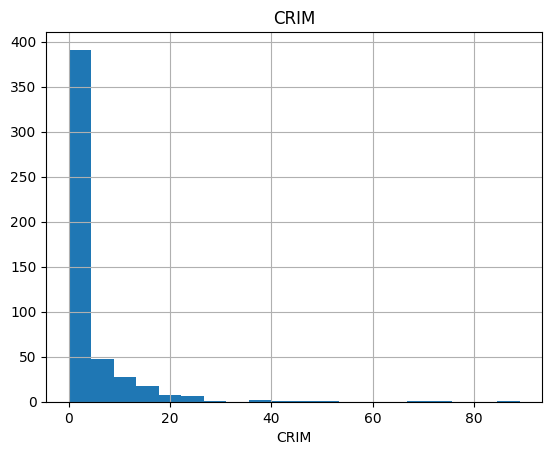

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%       20.000000
90%       42.500000
95%       80.000000
99%       90.000000
max      100.000000
Name: ZN, dtype: float64


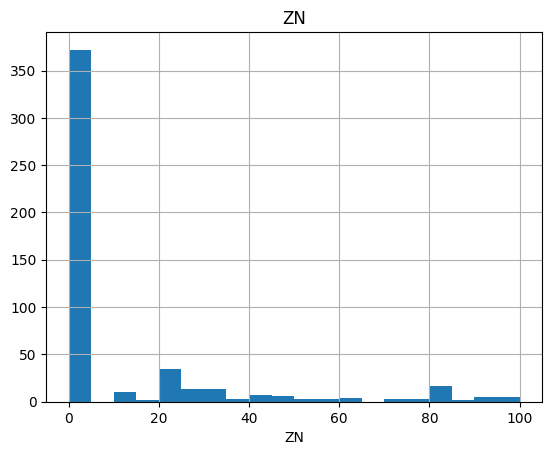

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
5%         2.180000
10%        2.910000
20%        4.390000
30%        5.960000
40%        7.380000
50%        9.690000
60%       12.830000
70%       18.100000
80%       18.100000
90%       19.580000
95%       21.890000
99%       25.650000
max       27.740000
Name: INDUS, dtype: float64


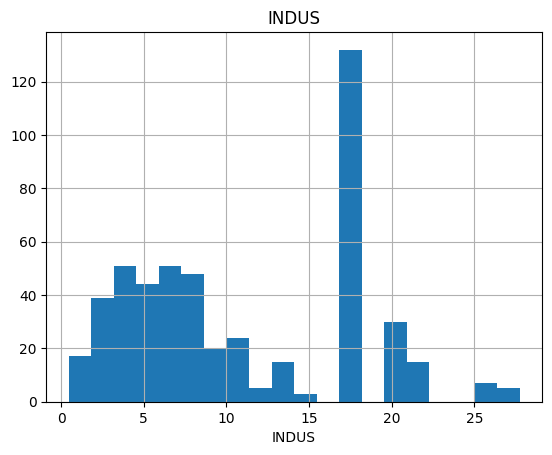

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%        0.000000
95%        1.000000
99%        1.000000
max        1.000000
Name: CHAS, dtype: float64


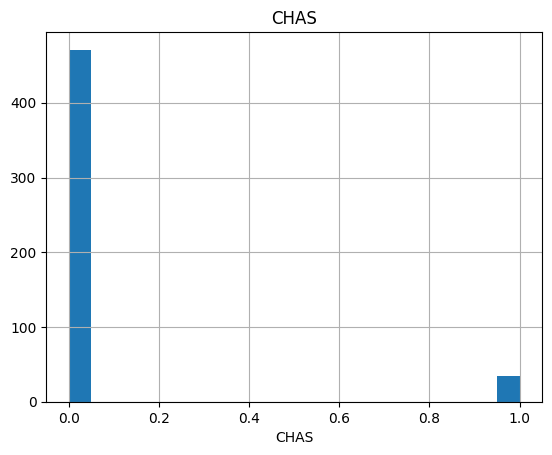

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
5%         0.409250
10%        0.427000
20%        0.442000
30%        0.472000
40%        0.507000
50%        0.538000
60%        0.575000
70%        0.605000
80%        0.668000
90%        0.713000
95%        0.740000
99%        0.871000
max        0.871000
Name: NOX, dtype: float64


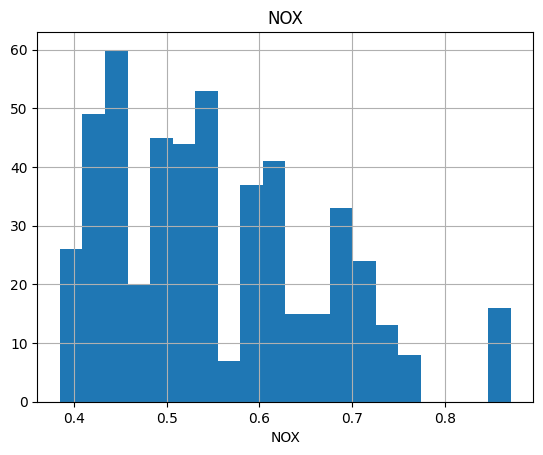

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
5%         5.314000
10%        5.593500
20%        5.837000
30%        5.950500
40%        6.086000
50%        6.208500
60%        6.376000
70%        6.502500
80%        6.750000
90%        7.151500
95%        7.587500
99%        8.335000
max        8.780000
Name: RM, dtype: float64


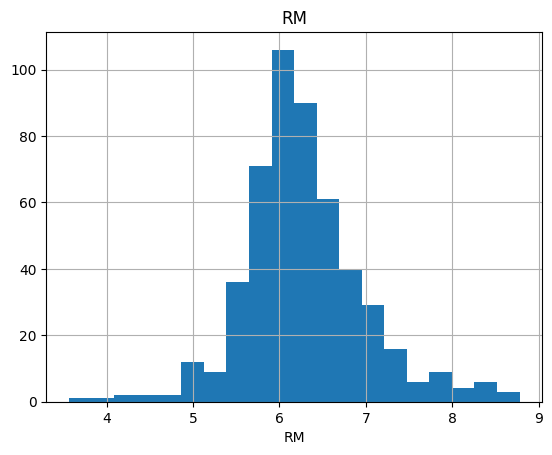

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
5%        17.725000
10%       26.950000
20%       37.800000
30%       52.400000
40%       65.400000
50%       77.500000
60%       85.900000
70%       91.800000
80%       95.600000
90%       98.800000
95%      100.000000
99%      100.000000
max      100.000000
Name: AGE, dtype: float64


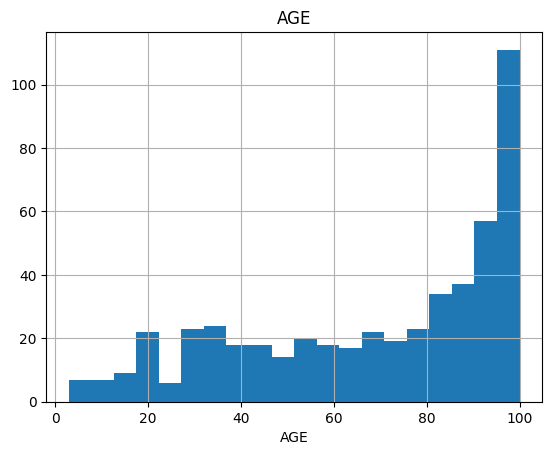

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
5%         1.461975
10%        1.628300
20%        1.951200
30%        2.259650
40%        2.640300
50%        3.207450
60%        3.875000
70%        4.540400
80%        5.615000
90%        6.816600
95%        7.827800
99%        9.222770
max       12.126500
Name: DIS, dtype: float64


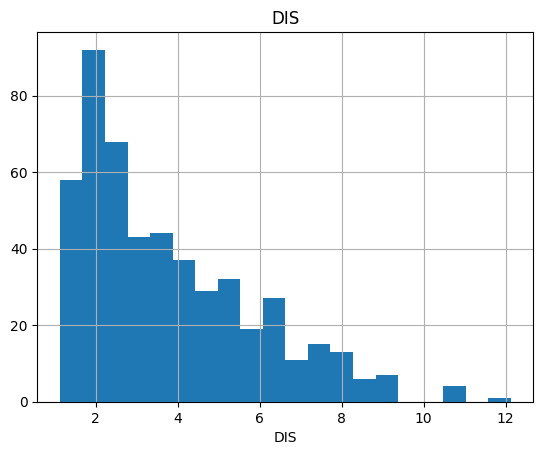

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
5%         2.000000
10%        3.000000
20%        4.000000
30%        4.000000
40%        5.000000
50%        5.000000
60%        5.000000
70%        8.000000
80%       24.000000
90%       24.000000
95%       24.000000
99%       24.000000
max       24.000000
Name: RAD, dtype: float64


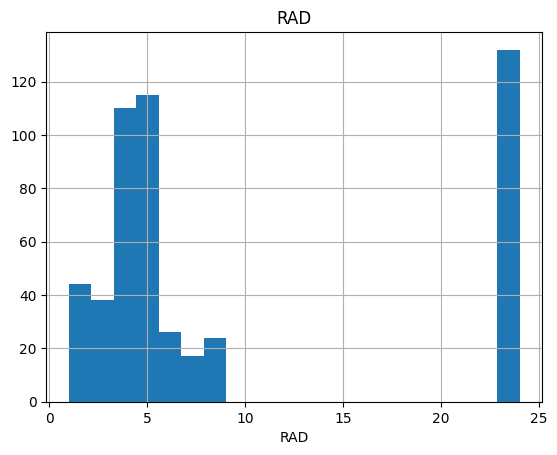

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
5%       222.000000
10%      233.000000
20%      273.000000
30%      289.000000
40%      307.000000
50%      330.000000
60%      398.000000
70%      437.000000
80%      666.000000
90%      666.000000
95%      666.000000
99%      666.000000
max      711.000000
Name: TAX, dtype: float64


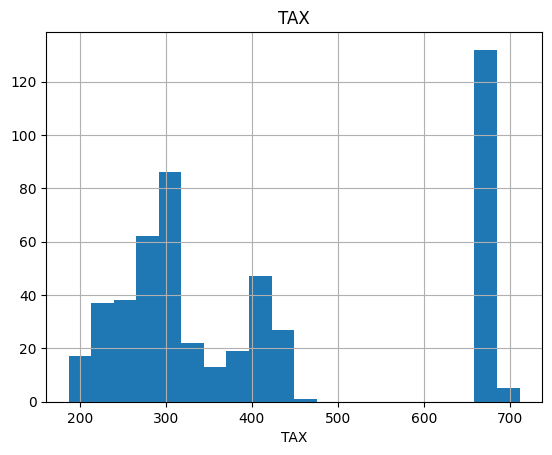

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
5%        14.700000
10%       14.750000
20%       16.600000
30%       17.800000
40%       18.400000
50%       19.050000
60%       19.700000
70%       20.200000
80%       20.200000
90%       20.900000
95%       21.000000
99%       21.200000
max       22.000000
Name: PTRATIO, dtype: float64


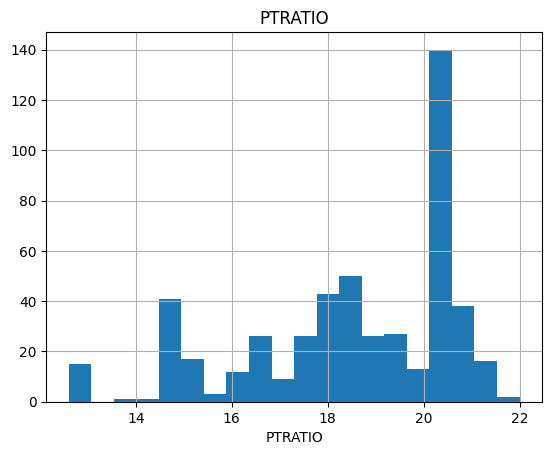

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
5%        84.590000
10%      290.270000
20%      364.310000
30%      378.665000
40%      387.970000
50%      391.440000
60%      393.530000
70%      395.465000
80%      396.900000
90%      396.900000
95%      396.900000
99%      396.900000
max      396.900000
Name: B, dtype: float64


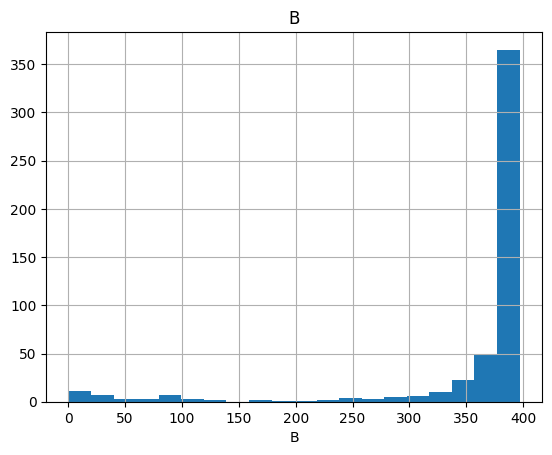

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
5%         3.707500
10%        4.680000
20%        6.290000
30%        7.765000
40%        9.530000
50%       11.360000
60%       13.330000
70%       15.620000
80%       18.060000
90%       23.035000
95%       26.807500
99%       33.918500
max       37.970000
Name: LSTAT, dtype: float64


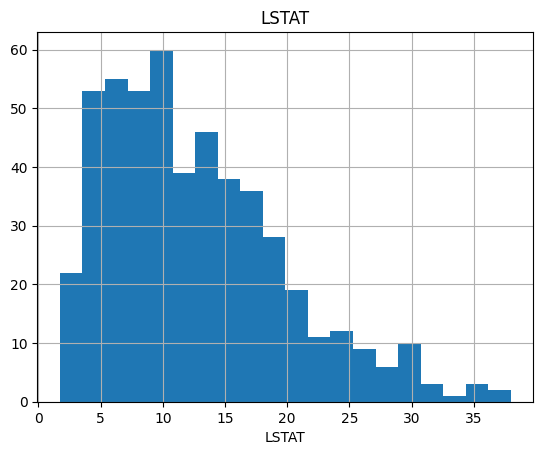

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
5%        10.200000
10%       12.750000
20%       15.300000
30%       18.200000
40%       19.700000
50%       21.200000
60%       22.700000
70%       24.150000
80%       28.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: PRICE, dtype: float64


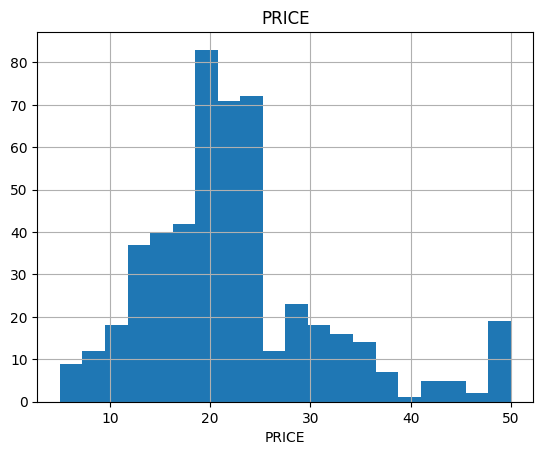

In [175]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in df.columns:
    num_summary(df, col, plot=True)

<Axes: >

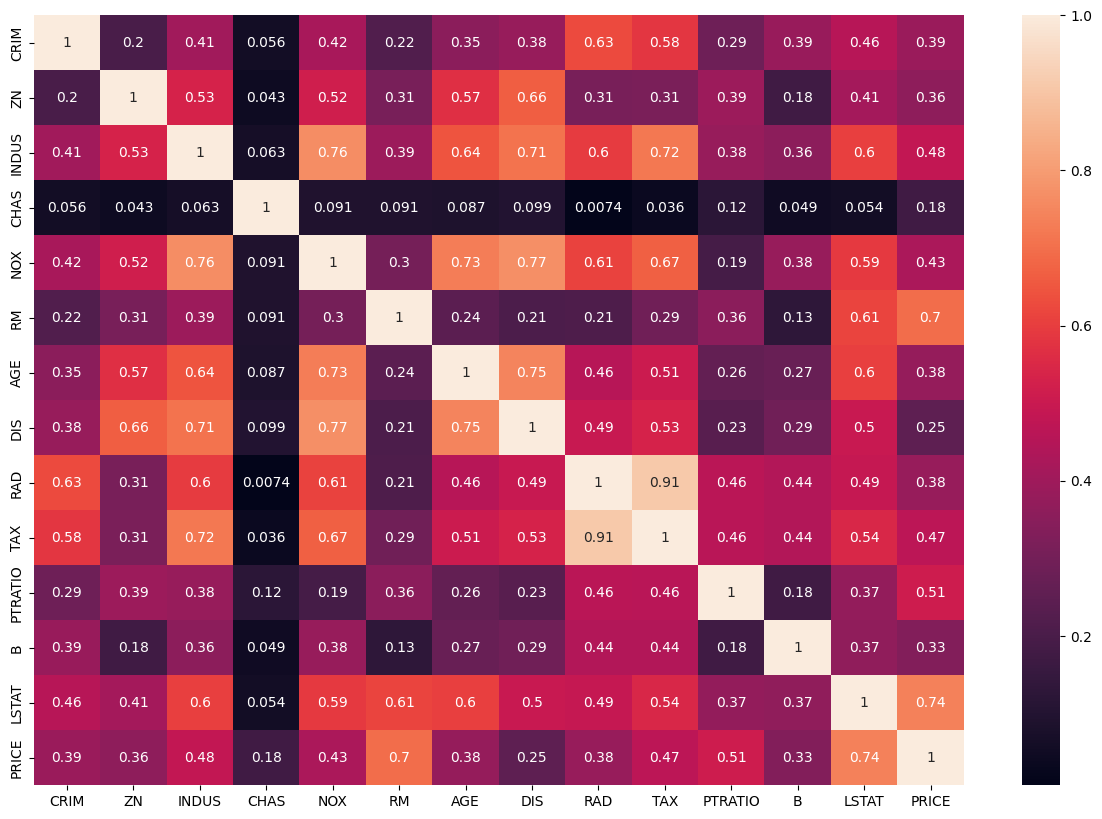

In [176]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(), annot=True)

In [177]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


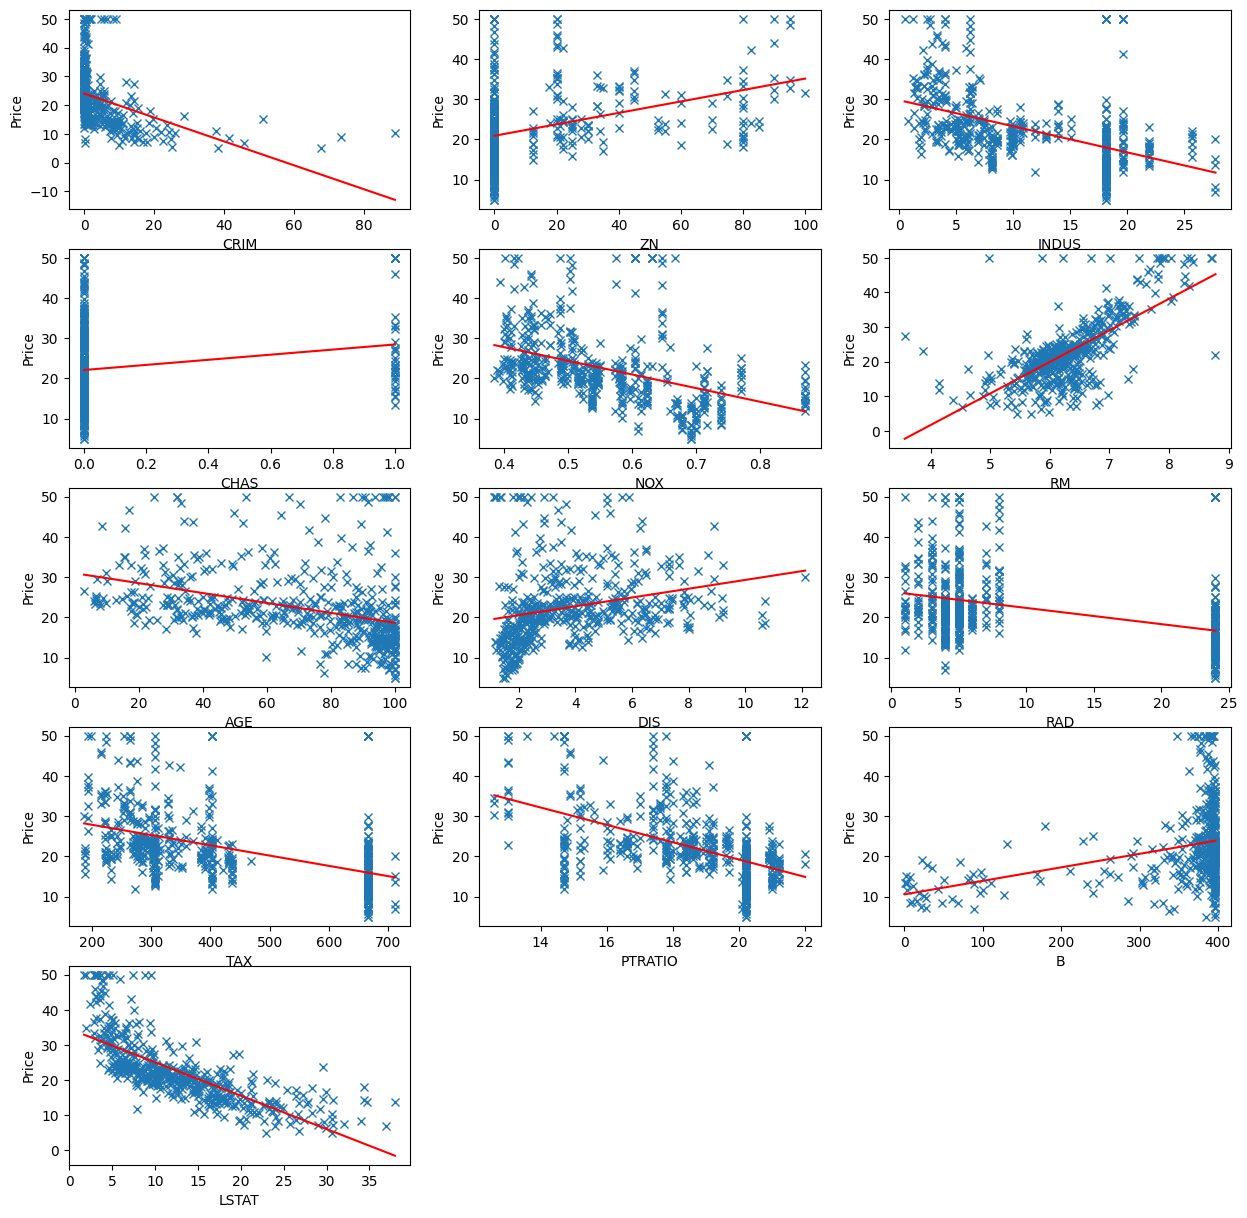

In [178]:
plt.figure(figsize=(15, 15))

for i, idx in enumerate(df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['PRICE']
    plt.plot(x, y, 'x')
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Price')

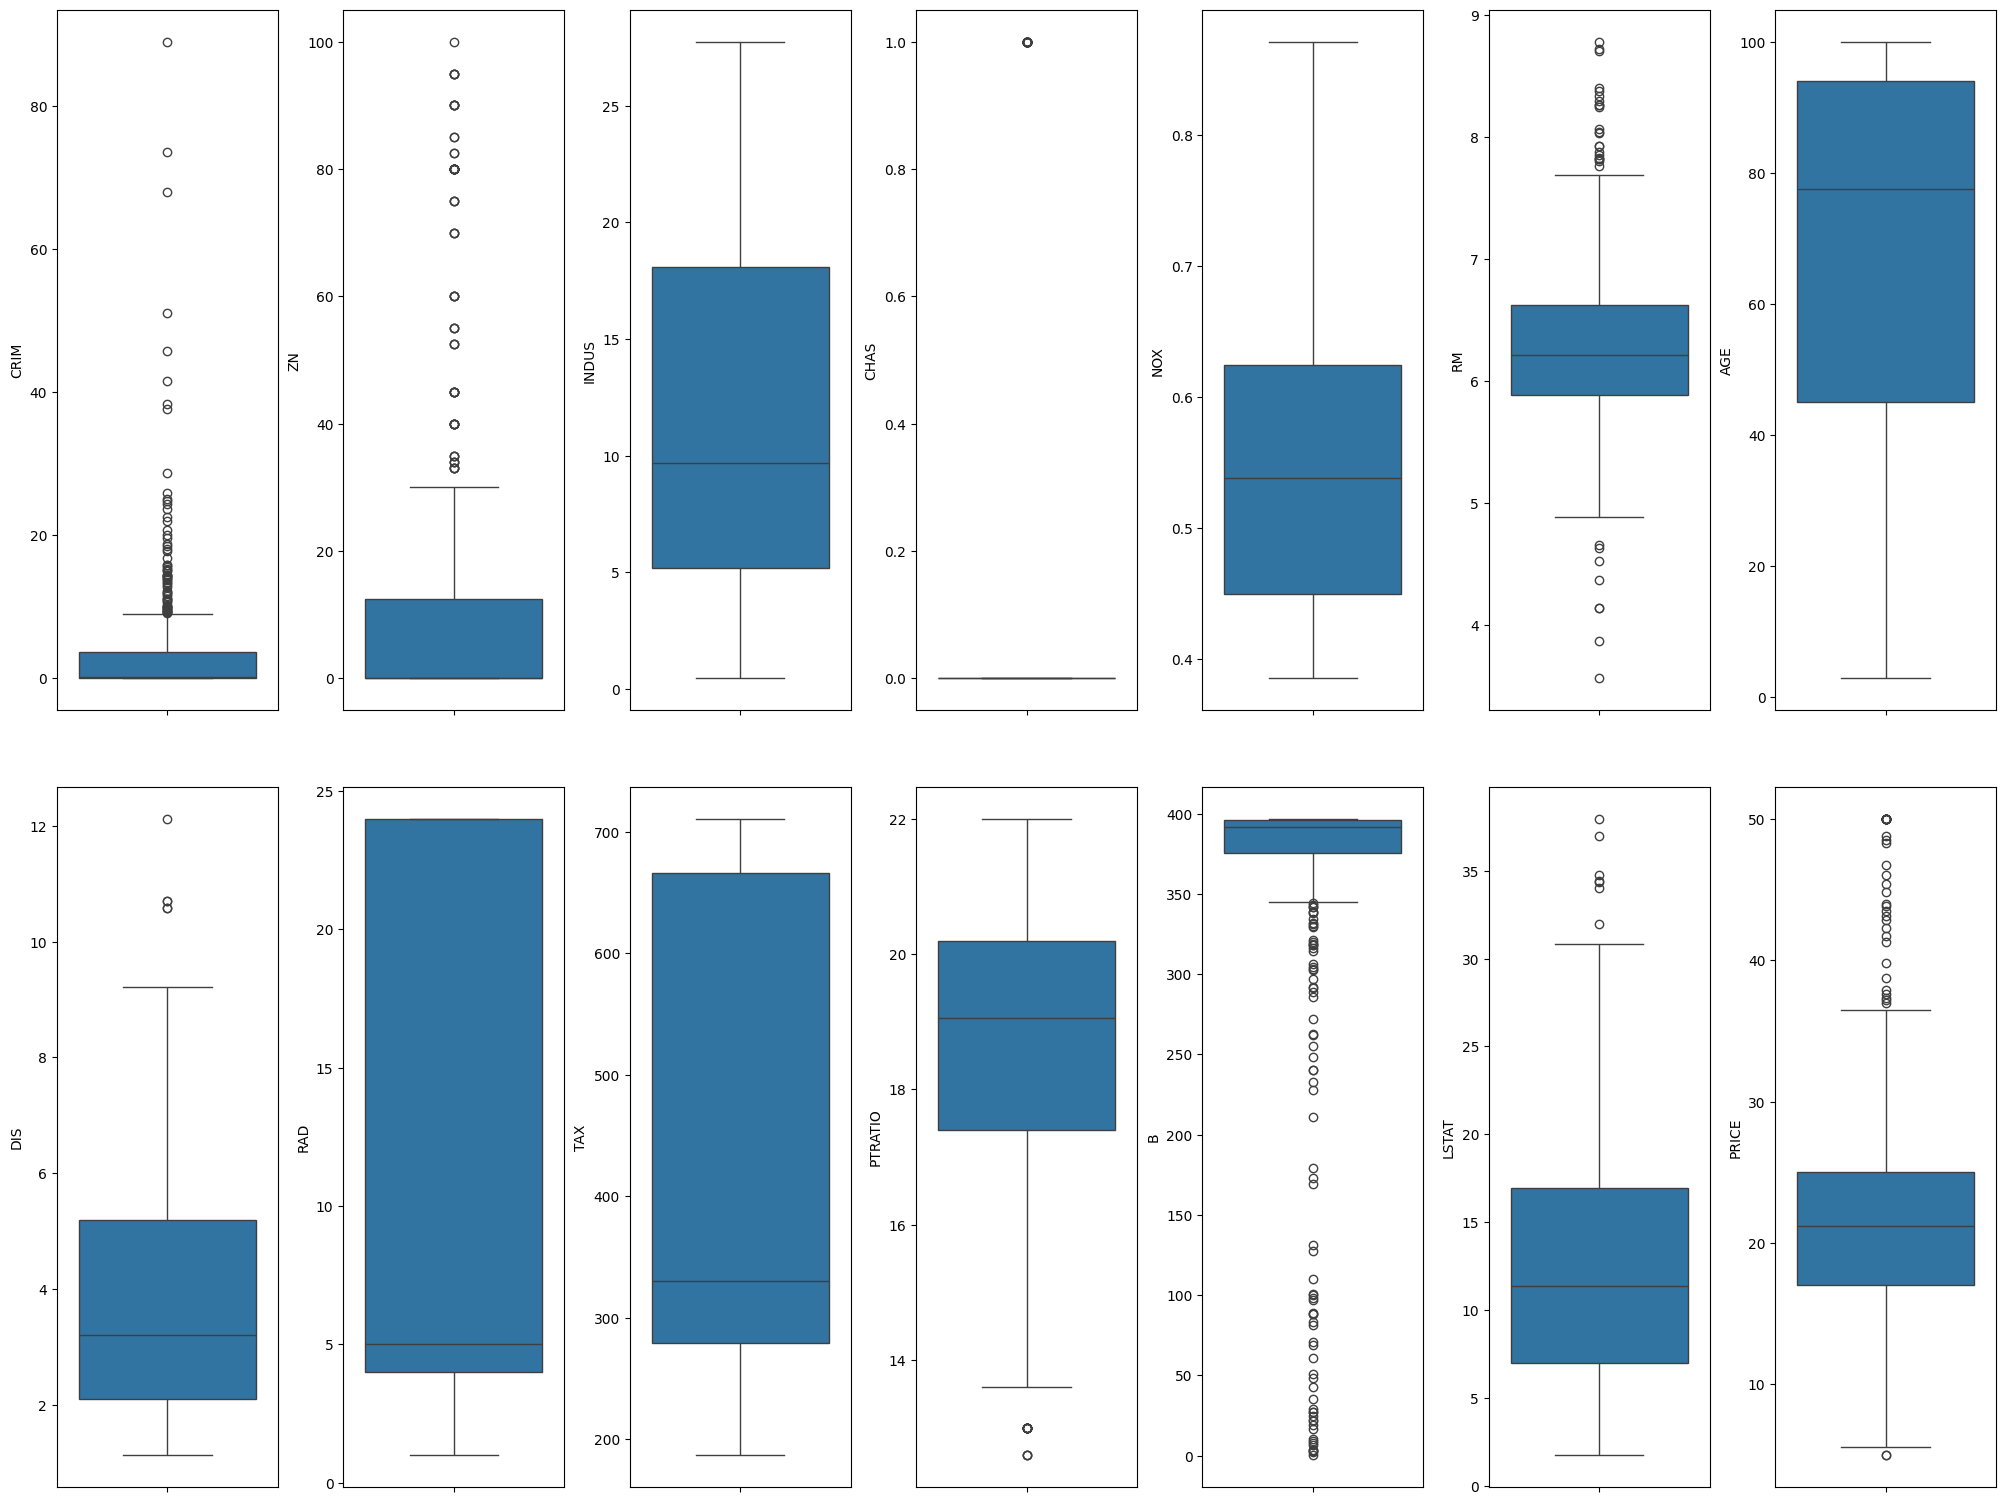

In [179]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [180]:
X = df.drop(columns='PRICE')
y = df['PRICE']

In [186]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print('Training Shape: ',x_train.shape)
print('Testing  Shape: ',x_test.shape)

Training Shape:  (404, 13)
Testing  Shape:  (102, 13)


## Linear Regression

In [187]:
model = LinearRegression()
model.fit(x_train, y_train)

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
y_pred= model.predict(x_train)
print(f"The training accuracy is: {model.score(x_train, y_train)*100}")

The training accuracy is: 75.0121534530608


Testing accuracy is:  67.09339839115628
Model accuracy is:  73.59440546073013


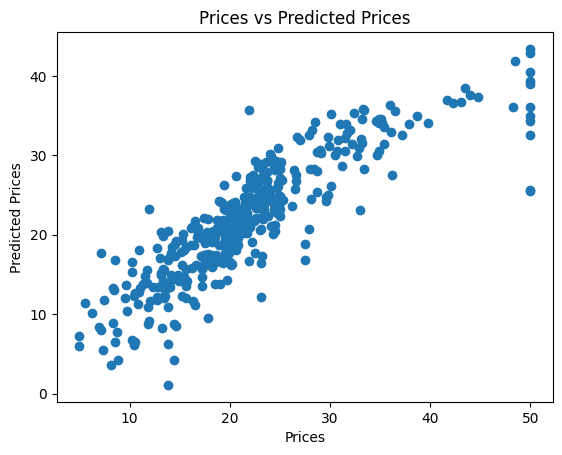

In [188]:
print("Testing accuracy is: ", model.score(x_test, y_test)*100)
print("Model accuracy is: ", r2_score(y, model.predict(X))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

## Random Forest

In [194]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

y_pred = model.predict(x_train)
print('Training Accuracy: ', model.score(x_train, y_train)*100)

Training Accuracy:  97.86700128115915


Testing Accuracy:  85.7376453397868
Model Accuracy:  94.88580448099472


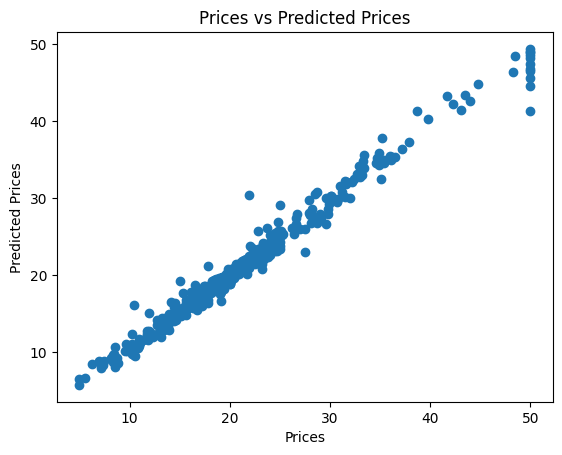

In [197]:
model.predict(x_test)
print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(X))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_